In [1]:
#Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras

# Import of keras model and hidden layers for our convolutional network
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout

#Image handling libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

#Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Initialize a list of paths for images
imagepaths = []

import os

# Specify the path to your local directory containing images
local_directory = 'Data/leapGestRecog'

for filename in os.listdir(local_directory):
    path = os.path.join(local_directory, filename)
    if path.endswith(".png"):
        imagepaths.append(path)

print(len(imagepaths))

#print(imagepaths)

Using TensorFlow backend.


40000


In [2]:
#Defining a function that plots the image selected from a path

def img_plot(img_path):
    img = cv2.imread(img_path)
    #convert to RGB space
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #check the shape of the image
    print("Shape of the image is ", img_rgb.shape)
    #Display the image
    plt.grid(False)
    plt.imshow(img_rgb)
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.title("Image " + img_path)

In [5]:
# Make the test train split
threshold = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = threshold, random_state = 42)

In [6]:
# Create a CNN Sequential Model
model = Sequential()
model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
#Model configuration for training purpose
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=2, 
         validation_data=(X_test, y_test))

Train on 13999 samples, validate on 6000 samples
Epoch 1/5
 - 10s - loss: 0.5688 - accuracy: 0.8659 - val_loss: 0.0373 - val_accuracy: 0.9902
Epoch 2/5
 - 5s - loss: 0.0250 - accuracy: 0.9926 - val_loss: 0.0112 - val_accuracy: 0.9963
Epoch 3/5
 - 5s - loss: 0.0139 - accuracy: 0.9963 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 4/5
 - 5s - loss: 0.0116 - accuracy: 0.9968 - val_loss: 0.0035 - val_accuracy: 0.9990
Epoch 5/5
 - 5s - loss: 0.0111 - accuracy: 0.9966 - val_loss: 0.0031 - val_accuracy: 0.9997


In [9]:
model.save('handgesturerecog_model.h5')

**TESTING THE MODEL**

In [10]:
#calculate loss and accuracy on test data

tLoss, tAccuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(tAccuracy*100))

6000/6000 [==============================] - 1s 160us/step
Test accuracy: 99.97%


In [11]:
# Making predictions on test data
prediction = model.predict(X_test)

In [12]:
#Lets compare the predicted value with actual label value
# Ideally both prediction[0] and y_test[0] should be same
np.argmax(prediction[0]), y_test[0]

(6, 6)

In [13]:
# Function to plot images and labels for validation purposes
def validate_gestures(predictions_array, true_label_array, img_array):
  # Array for pretty printing and then figure size
  class_names = ["down", "palm", "l", "fist", "fist_moved", "thumb", "index", "ok", "palm_moved", "c"] 
  plt.figure(figsize=(15,5))
  
  for i in range(1, 10):
    # Just assigning variables
    prediction = predictions_array[i]
    true_label = true_label_array[i]
    img = img_array[i]
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
    # Plot in a good way
    plt.subplot(3,3,i)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction) # Get index of the predicted label from prediction
    
    # Change color of title based on good prediction or not
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("Predicted: {} {:2.0f}% (Actual: {})".format(class_names[predicted_label],
                                  100*np.max(prediction),
                                  class_names[true_label]),
                                  color=color)
  plt.show()

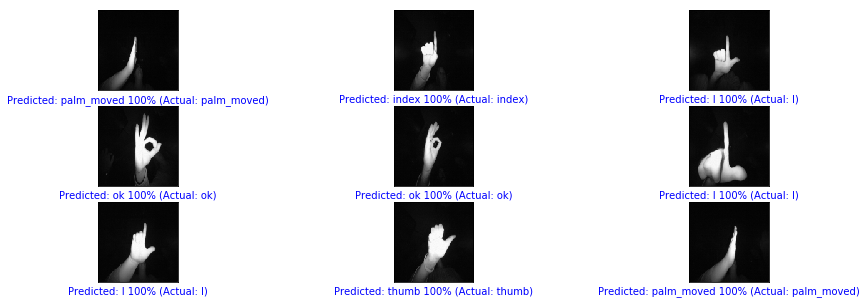

In [14]:
# Plot testing based on predictions and their actual values
validate_gestures(prediction, y_test, X_test)

In [15]:
#Transform predictions into 1D array 
y_pred = np.argmax(prediction, axis=1)

In [16]:
#Create a Confusion Matrix for Evaluation
# H = Horizontal
# V = Vertical
pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=["Predicted Thumb Down", "Predicted Palm (H)", "Predicted L", "Predicted Fist (H)", "Predicted Fist (V)", "Predicted Thumbs up", "Predicted Index", "Predicted OK", "Predicted Palm (V)", "Predicted C"],
             index=["Actual Thumb Down", "Actual Palm (H)", "Actual L", "Actual Fist (H)", "Actual Fist (V)", "Actual Thumbs up", "Actual Index", "Actual OK", "Actual Palm (V)", "Actual C"])

,Predicted Thumb Down,Predicted Palm (H),Predicted L,Predicted Fist (H),Predicted Fist (V),Predicted Thumbs up,Predicted Index,Predicted OK,Predicted Palm (V),Predicted C
Actual Thumb Down,597,0,0,0,0,0,0,0,0,0
Actual Palm (H),0,596,0,0,0,0,0,0,0,0
Actual L,0,0,597,0,0,0,0,0,0,0
Actual Fist (H),0,1,0,568,0,0,0,0,0,0
Actual Fist (V),0,0,0,0,612,0,0,0,0,0
Actual Thumbs up,0,0,0,1,0,616,0,0,0,0
Actual Index,0,0,0,0,0,0,591,0,0,0
Actual OK,0,0,0,0,0,0,0,601,0,0
Actual Palm (V),0,0,0,0,0,0,0,0,602,0
Actual C,0,0,0,0,0,0,0,0,0,618
